# word2vec

Make exports available:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imports

In [31]:
from similarities.similarities import Word2VecSimilarity
from os import listdir
from statistics import mean, stdev
import matplotlib.pyplot as plt
import time

## Definitions

In [3]:
modelPath = "../../models/word2vec/word2vec.model"
spacyPath ="../../models/word2vec/spacy.word2vec.model"
experimentsClass = Word2VecSimilarity(modelPath, spacyPath)

pathDataExperiment1 = "../../data/experiment1-small_text-continuous/"
pathDataExperiment2 = "../../data/experiment2-big_text-continuous/docs/"

# DOCUMENTS EXPERIMENT 1

print("DOCUMENTS EXPERIMENT 1\n")

docsExp1 = []
orgExp1 = ""
for doc in listdir(pathDataExperiment1):
    if doc.endswith(".txt"):
        if doc[-7:] == "ORG.txt":
            orgExp1 = pathDataExperiment1 + doc
        else:
            docsExp1.append(pathDataExperiment1 + doc)
            
docsExp1.sort(key = lambda x: int(x.split("_")[-1][:-4]))
            
print("DOCS: " + str(docsExp1) + "\n")
print("ORG: " + orgExp1)


# DOCUMENTS EXPERIMENT 2

print("\n DOCUMENTS EXPERIMENT 2\n")

docsExp2 = []
orgExp2 = ""
for doc in listdir(pathDataExperiment2):
    if doc.endswith(".txt"):
        if doc == "AE.txt":
            orgExp2 = pathDataExperiment2 + doc
        elif doc == "AI.txt":
            continue
        else:
            docsExp2.append(pathDataExperiment2 + doc)
            
docsExp2.sort(key = lambda x: int(x.split("_")[-1][:-4]))
            
print("DOCS: " + str(docsExp2) + "\n")
print("ORG: " + orgExp2)

DOCUMENTS EXPERIMENT 1

DOCS: ['../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_000.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_010.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_20.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_30.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_040.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_50.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_060.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_070.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_080.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_090.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_100.txt']

ORG: ../../data/experiment1-small_text-continuous/ORG.txt

 DOCUMENTS EXPERIMENT 2

DOCS: ['../../data/experiment2-big_text-continuous/docs/AE_AI_0.txt', '../../data/ex

## Experiments

### Experiment I (Small texts) - Model validation (Soft-Cosine Similarity)

In [4]:
results11 = []
times11 = []

for doc in docsExp1:
    start_time = time.time()
    results11.append(experimentsClass.distance(orgExp1, doc, 0, -1))
    times11.append(time.time() - start_time)

results11 = [1 - x for x in results11]

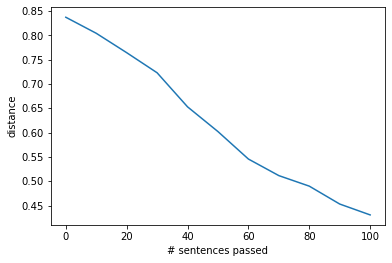

In [6]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results11)

plt.savefig('../../figures/word2vec_exp1_smallText_SoftCosine.png')

In [7]:
results11

[0.8373443034577772,
 0.8043647114836845,
 0.7644658433217806,
 0.7231194156051639,
 0.6530538985989716,
 0.6021151445289421,
 0.5456547968412497,
 0.5115596314104539,
 0.4899046540663886,
 0.4530937482193509,
 0.43072256262644026]

In [8]:
print("Mean execution time: " + str(mean(times11)))

Mean execution time: 3.272972497073087


In [9]:
times11

[3.695349931716919,
 2.9103636741638184,
 4.132259845733643,
 3.079501152038574,
 3.536520004272461,
 2.6706278324127197,
 3.8888309001922607,
 3.020763874053955,
 3.299190044403076,
 2.996373176574707,
 2.7729170322418213]

### Experiment I (Small texts) - Model validation (Normal Word Mover's Distance)

In [11]:
results12n = []
times12n = []

for doc in docsExp1:
    start_time = time.time()
    results12n.append(experimentsClass.distance(orgExp1, doc, 1, False))
    times12n.append(time.time() - start_time)

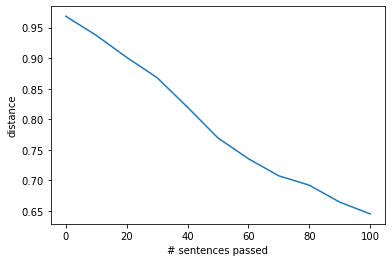

In [12]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results12n)

plt.savefig('../../figures/word2vec_exp1_smallText_NormalWordMovers.png')

In [13]:
results12n

[0.9685764133278085,
 0.9373626305008662,
 0.9013578099261742,
 0.8681376600126788,
 0.8197911346916691,
 0.7694785987956645,
 0.7355511198472152,
 0.7075436013310777,
 0.6922805471891833,
 0.6645300437918381,
 0.6452678703833491]

In [14]:
print("Mean execution time: " + str(mean(times12n)))

Mean execution time: 37.88645746491172


In [15]:
times12n

[34.00653004646301,
 34.56532669067383,
 40.82390809059143,
 40.999038219451904,
 33.29704689979553,
 39.65659284591675,
 44.37485885620117,
 41.33107781410217,
 35.83175706863403,
 37.047632694244385,
 34.81726288795471]

### Experiment I (Small texts) - Model validation (Relaxed Word Mover's Distance)

In [16]:
results12r = []
times12r = []

for doc in docsExp1:
    start_time = time.time()
    results12r.append(experimentsClass.distance(orgExp1, doc, 1, True))
    times12r.append(time.time() - start_time)

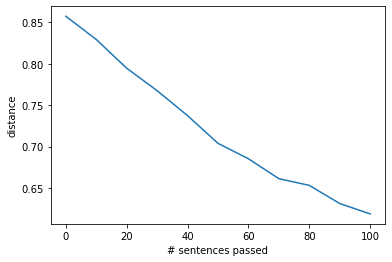

In [17]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results12r)

plt.savefig('../../figures/word2vec_exp1_smallText_RelaxedWordMovers.png')

In [18]:
results12r

[0.8572365045547485,
 0.8292422294616699,
 0.7945721745491028,
 0.7674574255943298,
 0.7373602390289307,
 0.7039303183555603,
 0.6853122711181641,
 0.6612838506698608,
 0.6531853675842285,
 0.6313357353210449,
 0.6187763810157776]

In [19]:
print("Mean execution time: " + str(mean(times12r)))

Mean execution time: 0.3850804458964955


In [20]:
times12r

[0.508573055267334,
 0.34047508239746094,
 0.3579678535461426,
 0.39603304862976074,
 0.36461782455444336,
 0.36953210830688477,
 0.3646109104156494,
 0.33118200302124023,
 0.38553905487060547,
 0.39786291122436523,
 0.4194910526275635]

### Experiment II (Big texts) - Model validation (Soft-Cosine Similarity)

In [21]:
results21 = []
times21 = []

for doc in docsExp2:
    start_time = time.time()
    results21.append(experimentsClass.distance(orgExp2, doc, 0, -1))
    times21.append(time.time() - start_time)
    
results21 = [1 - x for x in results21]

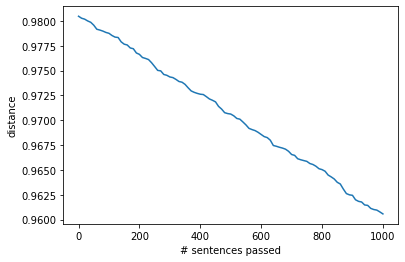

In [22]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 1010, 10)), results21)

plt.savefig('../../figures/word2vec_exp2_bigText_SoftCosine.png')

In [23]:
results21

[0.9804731147403378,
 0.9802738229913219,
 0.9801807110485302,
 0.9800005538934766,
 0.9798648765414272,
 0.9795715725973538,
 0.9791658232191748,
 0.979081728161682,
 0.9789768229876679,
 0.9788416955554254,
 0.9787545099771837,
 0.9785320418232436,
 0.9783717888121695,
 0.9783336329225987,
 0.9778955930187764,
 0.9776604843126995,
 0.9775793723177981,
 0.9772788477145455,
 0.9772021449757178,
 0.9767758564304154,
 0.9766344919760738,
 0.9763188994995441,
 0.9762255512485217,
 0.9761105882933327,
 0.975790208389815,
 0.975410623626857,
 0.9750216077146218,
 0.9749721991487791,
 0.9746111017058418,
 0.9745276443000165,
 0.9743597078922894,
 0.9742950816177341,
 0.9741144093465467,
 0.9739022741536277,
 0.973830624013701,
 0.9736119682201209,
 0.9732695038653729,
 0.9729548915007289,
 0.9728111614767517,
 0.9727059933394346,
 0.9726221084193154,
 0.9725884536409131,
 0.9723748551835971,
 0.9721449683365462,
 0.9720107093480987,
 0.9718517737273958,
 0.9713965463111114,
 0.97112616538118

In [24]:
print("Mean execution time: " + str(mean(times21)))

Mean execution time: 21.199517809518493


In [32]:
print("Stdev execution time: " + str(stdev(times21)))

Stdev execution time: 3.2242053142896414


In [25]:
times21

[22.998167037963867,
 18.612845182418823,
 18.75726318359375,
 18.66329073905945,
 19.285535097122192,
 20.387266635894775,
 18.626755237579346,
 18.425336837768555,
 19.239057064056396,
 19.95474910736084,
 19.171804189682007,
 18.309789180755615,
 18.51913595199585,
 19.233487129211426,
 19.55919909477234,
 18.509407997131348,
 18.3177170753479,
 18.65227174758911,
 18.818954944610596,
 18.969249963760376,
 18.984814167022705,
 19.693756818771362,
 18.534905910491943,
 19.021212816238403,
 18.87314200401306,
 18.45577383041382,
 19.197951078414917,
 18.989052057266235,
 19.239802837371826,
 21.090685844421387,
 19.46600604057312,
 18.519938230514526,
 21.932926893234253,
 26.43396806716919,
 25.188156127929688,
 21.40689182281494,
 22.29836916923523,
 27.16173791885376,
 25.01485800743103,
 26.358779907226562,
 26.086416959762573,
 25.398417949676514,
 24.266259908676147,
 23.412989854812622,
 24.840951681137085,
 27.018006086349487,
 28.839098930358887,
 29.070796012878418,
 24.8611

### Experiment II (Big texts) - Model validation (Word Mover's Distance)

In [26]:
results22 = []
times22 = []

for doc in docsExp2:
    start_time = time.time()
    results22.append(experimentsClass.distance(orgExp2, doc, 1, True))
    times22.append(time.time() - start_time)

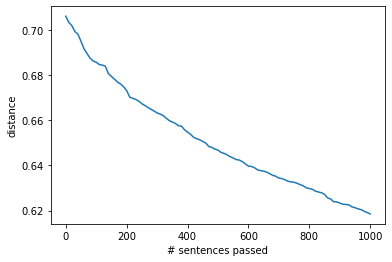

In [27]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 1010, 10)), results22)

plt.savefig('../../figures/word2vec_exp2_bigText_WordMovers.png')

In [28]:
results22

[0.7060697078704834,
 0.7033292651176453,
 0.7018851637840271,
 0.69927978515625,
 0.6981016397476196,
 0.6949396133422852,
 0.6916301846504211,
 0.6895061731338501,
 0.6874445080757141,
 0.6862085461616516,
 0.6857061982154846,
 0.684668242931366,
 0.6844307780265808,
 0.6839209198951721,
 0.680671215057373,
 0.6793859601020813,
 0.678180456161499,
 0.6768983602523804,
 0.6760365962982178,
 0.6748226284980774,
 0.6731303930282593,
 0.6702390313148499,
 0.6696975827217102,
 0.6691920161247253,
 0.6684340238571167,
 0.6672874093055725,
 0.6665198802947998,
 0.6656317710876465,
 0.6648168563842773,
 0.664075493812561,
 0.6632370352745056,
 0.662693977355957,
 0.6620811820030212,
 0.660895049571991,
 0.6598131656646729,
 0.6591917872428894,
 0.658577024936676,
 0.65756756067276,
 0.657401442527771,
 0.6557863354682922,
 0.6547098755836487,
 0.6537600159645081,
 0.6524283289909363,
 0.6517912149429321,
 0.6513413190841675,
 0.6505937576293945,
 0.6498677730560303,
 0.6483381390571594,
 0.6

In [29]:
print("Mean execution time: " + str(mean(times22)))

Mean execution time: 129.06265387440672


In [33]:
print("Stdev execution time: " + str(stdev(times22)))

Stdev execution time: 230.9860709537625


In [30]:
times22

[61.280134201049805,
 61.49137783050537,
 56.56311297416687,
 56.019126892089844,
 55.69645094871521,
 61.142499923706055,
 59.73068594932556,
 55.96108675003052,
 51.868605852127075,
 55.99481701850891,
 54.94674110412598,
 78.48764181137085,
 85.50540518760681,
 68.59348106384277,
 55.09164595603943,
 54.58310890197754,
 63.650323152542114,
 66.29989099502563,
 67.68695664405823,
 54.18709397315979,
 61.803207874298096,
 59.21928381919861,
 63.86291193962097,
 63.62260317802429,
 334.85267782211304,
 2319.981969833374,
 82.8614490032196,
 98.68484997749329,
 112.86402606964111,
 123.22355198860168,
 101.7893419265747,
 94.50675773620605,
 112.41272711753845,
 123.96100306510925,
 99.11815595626831,
 86.55656099319458,
 84.13387107849121,
 89.90644192695618,
 91.70754098892212,
 80.27621412277222,
 138.60241103172302,
 121.81751489639282,
 107.51497387886047,
 109.37784314155579,
 118.0429151058197,
 113.70777201652527,
 117.54419088363647,
 122.02487802505493,
 116.73367118835449,
 1